<a href="https://colab.research.google.com/github/Dmitry-365/1/blob/main/%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%BA%D0%B0_03_06_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# для работы с данными
import pandas as pd
import numpy as np

# быстрый вызов эконометрических команд
import statsmodels.api as sms
import statsmodels.formula.api as smf

import scipy.stats as stats
import statsmodels.stats.diagnostic as sm_diagnostic
import statsmodels.stats.stattools as sm_tools
import statsmodels.stats.outliers_influence as oi

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# саммари-таблички
!pip install stargazer
from stargazer.stargazer import Stargazer, LineLocation

# исключительно для датасета
!pip install linearmodels

# все для рисования
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
%matplotlib inline

# убрать предупреждения
import warnings
warnings.filterwarnings("ignore")

# ну куда ж без него
!pip install seaborn
import seaborn as sb


from sklearn.preprocessing import StandardScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.7 MB/s eta 0:00:00


# Авторегрессия Экспорт

In [ ]:
Export = pd.read_csv("data_export.csv", sep=";", decimal=",")
Export.head(500)


,year,EX
0,2000,6.48
1,2000,7.57
2,2000,8.71
3,2000,7.76
4,2000,7.96
...,...,...
283,2023,37.10
284,2023,40.30
285,2023,34.30
286,2023,33.70


In [ ]:
print(Export)

     year     EX
0    2000   6.48
1    2000   7.57
2    2000   8.71
3    2000   7.76
4    2000   7.96
..    ...    ...
283  2023  37.10
284  2023  40.30
285  2023  34.30
286  2023  33.70
287  2023  38.60

[288 rows x 2 columns]


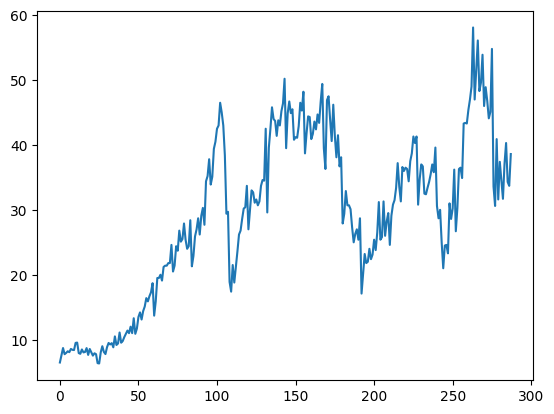

In [ ]:


plt.plot(Export['EX'])


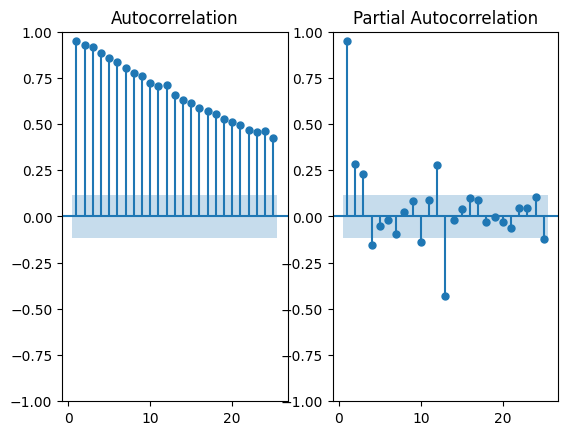

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as smp
fig, axes = plt.subplots(1, 2)
smp.plot_acf(Export['EX'], bartlett_confint=False, zero=False, ax=axes[0])
smp.plot_pacf(Export['EX'], zero=False, method='ywm',ax=axes[1])
plt.show()

In [ ]:
#1. Тест Дики-Фуллера (DF test) - проверяет наличие гетероскедастичности в остатках модели.
from statsmodels. tsa.stattools import adfuller
adfuller(Export['EX'])

(-2.0684273601848657,
 0.2573981120714508,
 16,
 271,
 {'1%': -3.4547128138328875,
  '5%': -2.8722649771800155,
  '10%': -2.5724850011573914},
 1350.1471875551824)

In [ ]:
 pip install arch

In [ ]:
import arch.unitroot as ar


In [ ]:
ar.ADF(Export['EX']).summary()


Test Statistic,-2.068
P-value,0.257
Lags,16


In [ ]:
#КПСС
ar.KPSS(Export['EX'])

Test Statistic,1.555
P-value,0.000
Lags,10


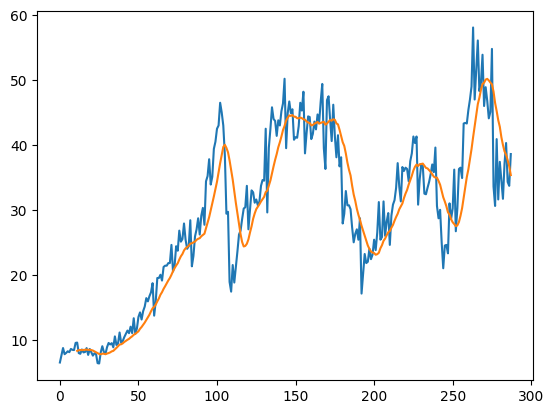

In [ ]:

from pandas import DataFrame

# Применяем скользящее среднее с окном 12
Export['season_Export'] = Export['EX'].rolling(window=12).mean()

# Планируем график
plt.plot(Export['EX'])
plt.plot(Export['season_Export'])
plt.show()

Смортим на то как будет ввести себя сглаженный ряд

In [ ]:
Export_season = Export['season_Export'][12:].diff().dropna()

In [ ]:
print(Export['season_Export'][11:])

11      8.267500
12      8.388333
13      8.409167
14      8.390833
15      8.414167
         ...    
283    39.016667
284    38.475000
285    37.658333
286    36.708333
287    35.358333
Name: season_Export, Length: 277, dtype: float64


In [ ]:
import csv

# Предположим, у нас есть список данных

# Открываем файл для записи
with open('fruits.csv', 'w', newline='') as file:
    # Создаем объект writer
    writer = csv.writer(file)
    # Записываем данные в файл
    writer.writerows(Export)

# Данные успешно сохранены в fruits.csv

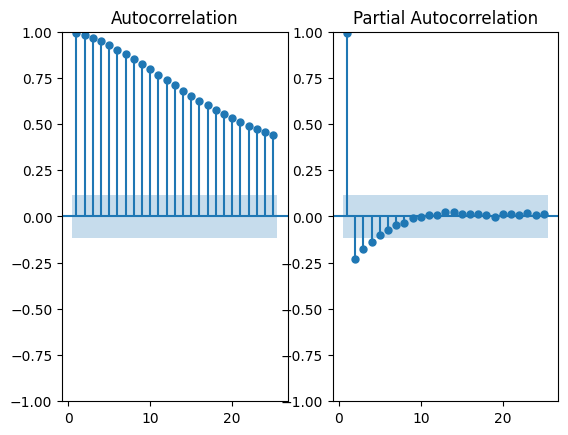

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as smp
fig, axes = plt.subplots(1, 2)
smp.plot_acf(Export['season_Export'][11:], bartlett_confint=False, zero=False, ax=axes[0])
smp.plot_pacf(Export['season_Export'][11:], zero=False, method='ywm',ax=axes[1])
plt.show()

In [ ]:
#КПСС
ar.KPSS(Export['season_Export'][11:])

Test Statistic,1.502
P-value,0.000
Lags,10


In [ ]:
import arch.unitroot as ar
ar.ADF(Export['season_Export'][11:])


Test Statistic,-2.174
P-value,0.216
Lags,16


In [ ]:
ar.PhillipsPerron(Export['season_Export'][11:])

Test Statistic,-1.943
P-value,0.312
Lags,16


Тепеоь берем разность , чтобы избавиться от тренда

In [ ]:
season_Export_d = Export['season_Export'][11:].diff().dropna()

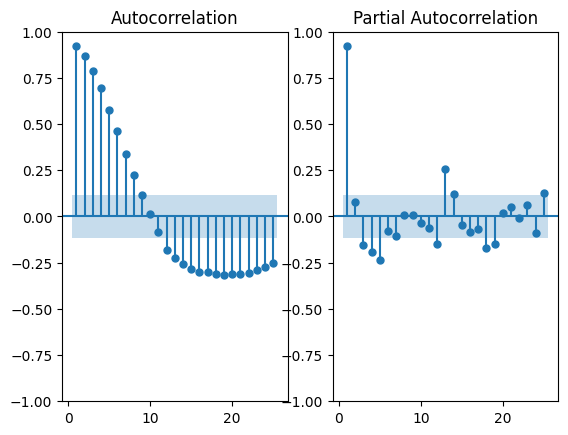

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as smp
fig, axes = plt.subplots(1, 2)
smp.plot_acf(season_Export_d, bartlett_confint=False, zero=False, ax=axes[0])
smp.plot_pacf(season_Export_d, zero=False, method='ywm',ax=axes[1])
plt.show()

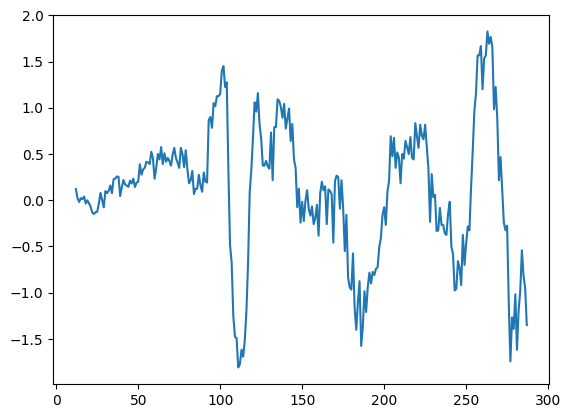

In [ ]:
plt.plot(season_Export_d)


In [ ]:
#КПСС
ar.KPSS(season_Export_d)

Test Statistic,0.114
P-value,0.523
Lags,10


In [ ]:
import arch.unitroot as ar
ar.ADF(season_Export_d)


Test Statistic,-3.697
P-value,0.004
Lags,16


In [ ]:
ar.PhillipsPerron(season_Export_d)

Test Statistic,-3.344
P-value,0.013
Lags,16


In [ ]:
pip install pmdarima

In [ ]:
#тест Дарбина-Ватсона в Python
from statsmodels.stats.stattools import durbin_watson
durbin_watson(Export['season_Export'][11:])
#Если фактическое значение критерия Дарбина-Уотсона равно 0,015, это может указывать на отсутствие автокорреляции,
#поскольку при отсутствии автокорреляции значение DW должно быть близко к 2


0.0005286996029357508

In [ ]:
durbin_watson(Export['season_Export'][11:])

0.0005286996029357508

In [ ]:
from pmdarima import auto_arima

# Поиск оптимальных параметров модели ARIMA
model = auto_arima(Export['season_Export'][11:], start_p=1, start_q=1, max_p=3, max_q=4, m=12,seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=57.083, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=609.433, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=55.922, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=376.682, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=612.451, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=56.745, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=56.758, Time=0.69 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=53.940, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=54.754, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=55.094, Time=0.41 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=378.285, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=54.768, Time=0.86 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 3.409 seconds


In [ ]:
#выбор параметров без учета сезонности
import statsmodels.tsa.arima.model as sma
model1 = sma.ARIMA(Export['season_Export'][11:], order=(3,1,4))
result1 = model1.fit()
print(result1.summary())

                               SARIMAX Results                                
Dep. Variable:          season_Export   No. Observations:                  277
Model:                 ARIMA(3, 1, 4)   Log Likelihood                  -4.154
Date:                Tue, 04 Jun 2024   AIC                             24.308
Time:                        18:39:23   BIC                             53.271
Sample:                             0   HQIC                            35.931
                                - 277                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8808      0.080     10.997      0.000       0.724       1.038
ar.L2          0.8400      0.058     14.418      0.000       0.726       0.954
ar.L3         -0.7884      0.068    -11.638      0.0

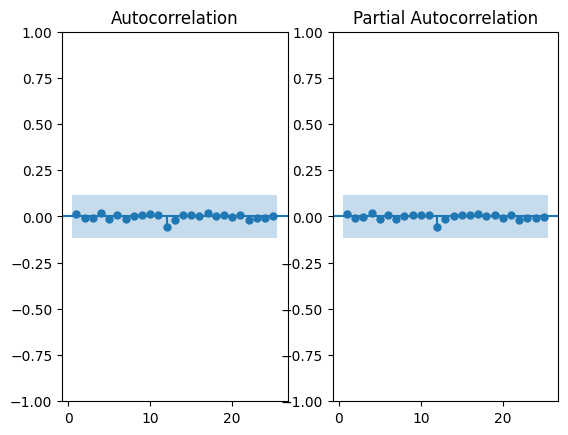

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as smp
fig, axes = plt.subplots(1, 2)
smp.plot_acf(result1.resid, bartlett_confint=False, zero=False, ax=axes[0])
smp.plot_pacf(result1.resid, zero=False, method='ywm',ax=axes[1])
plt.show()

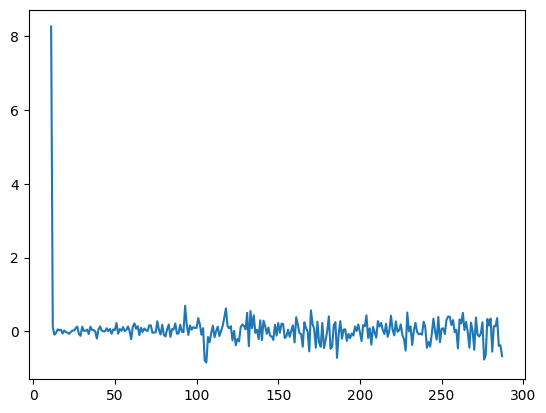

In [ ]:
plt.plot(result1.resid)

plt.show()

In [ ]:
#выбор параметров с учетом сезонности
import statsmodels.tsa.arima.model as sma
model2 = sma.ARIMA(Export['season_Export'][11:], order=(2,1,3))
result2 = model2.fit()
print(result2.summary())

                               SARIMAX Results                                
Dep. Variable:          season_Export   No. Observations:                  277
Model:                 ARIMA(2, 1, 3)   Log Likelihood                  -7.470
Date:                Tue, 04 Jun 2024   AIC                             26.940
Time:                        17:41:48   BIC                             48.662
Sample:                             0   HQIC                            35.657
                                - 277                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8066      0.073     24.840      0.000       1.664       1.949
ar.L2         -0.8426      0.067    -12.607      0.000      -0.974      -0.712
ma.L1         -1.0233      0.094    -10.916      0.0

In [ ]:
#Анализ остатков модели
import statsmodels.stats.api as sms
sms.jarque_bera(result1.resid)

(361785.1461543532, 0.0, 11.87682280113299, 178.44734185384058)

In [ ]:
sms.acorr_ljungbox(result1.resid, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.033306,0.855191,0.032948,0.855963
2,0.065025,0.968011,0.064212,0.968404
3,0.074020,0.994761,0.073046,0.994863
4,0.156939,0.997078,0.154182,0.997177
5,0.226319,0.998804,0.221821,0.998861
6,0.242844,0.999728,0.237872,0.999743
7,0.303527,0.999896,0.296598,0.999904
8,0.303569,0.999980,0.296638,0.999982
9,0.315444,0.999996,0.308045,0.999996
10,0.351225,0.999999,0.342287,0.999999


In [ ]:
#ARCH тест
sms.het_arch(result1.resid, ddof=2)


(27.246220365538104,
 0.002380600860459123,
 2.9337209378129,
 0.0016749955464646876)

In [ ]:
# Прогнозирование (ddof= p+q (в с улчае без ARIMA))
sms.het_arch(result1.resid, ddof=8)

(26.62932481009196,
 0.0029799041589168448,
 2.9337209378129,
 0.0016749955464646876)

In [ ]:
dataset = pd.DataFrame({'Y': result1.resid})
sms.acorr_breusch_godfrey(smf.ols('Y ~ 1', data=dataset).fit(), nlags=1)

(0.03314774694576639,
 0.8555315373001857,
 0.032912351553663344,
 0.8561734336211201)

In [ ]:
dataset = pd.DataFrame({'Y': result1.resid})
sms.acorr_breusch_godfrey(smf.ols('Y ~ 1', data=dataset).fit(), nlags=12)

(1.3618554348452163,
 0.999922483408499,
 0.10869620245724443,
 0.9999330318180639)

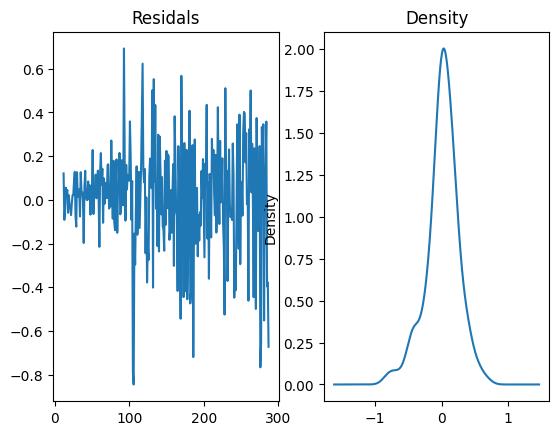

In [ ]:
import matplotlib.pyplot as plt
residuals = result1.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()


In [ ]:
pip install pmdarima

In [ ]:
from pmdarima import auto_arima

In [ ]:

forecast_test_auto= auto_arima.predict(n_periods=len(df_test))
result1['forecast_auto']=[None]*len(df_train)+list(forecast_test_auto)
result1.plot()

In [ ]:
# Прогнозирование
Y_forecast = result1.get_forecast(steps=10)
print(Y_forecast.predicted_mean)

288    34.173258
289    33.082549
290    31.966450
291    31.018460
292    30.105848
293    29.385627
294    28.732043
295    28.270869
296    27.883464
297    27.670125
Name: predicted_mean, dtype: float64


In [ ]:
#СВОЙСТВА ПРОГНОЗОВ. Средняя абсолютная процентная ошибка прогнозирование MAPE ( 395 )
model11 = sma.ARIMA(Export['season_Export'][241:277], order=(3,1,4), enforce_stationarity=False)
with model11.fix_params({'ar.L1': 0}):
# fit тренирует модель
  result11 = model11.fit()
  print(result11.summary())

                               SARIMAX Results                                
Dep. Variable:          season_Export   No. Observations:                   36
Model:                 ARIMA(3, 1, 4)   Log Likelihood                  -3.918
Date:                Tue, 04 Jun 2024   AIC                             21.835
Time:                        18:42:43   BIC                             31.643
Sample:                             0   HQIC                            24.973
                                 - 36                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1 (fixed)          0        nan        nan        nan         nan         nan
ar.L2            -0.0475      0.129     -0.368      0.713      -0.300       0.205
ar.L3             0.8884      0.140     

In [ ]:
result_full = result11.apply(Export['season_Export'][241:277])
result_forecast = result11.get_forecast(steps=36)
E = Export['EX'][312:156] - result_forecast.predicted_mean

In [ ]:
result_forecast.predicted_mean[:36]

277    47.274152
278    46.332454
279    45.090251
280    43.991897
281    43.214221
282    42.162746
283    41.223850
284    40.582844
285    39.693247
286    38.889533
287    38.362265
288    37.610070
289    36.921055
290    36.488315
291    35.852746
292    35.261147
293    34.906853
294    34.370275
295    33.861500
296    33.572200
297    33.119637
298    32.681360
299    32.445816
300    32.064549
301    31.686352
302    31.495183
303    31.174405
304    30.847480
305    30.692863
306    30.423391
307    30.140282
308    30.015705
309    29.789735
310    29.544127
311    29.444174
312    29.255073
Name: predicted_mean, dtype: float64

In [ ]:
result_full.resid[:36]

241    34.458333
242    -0.583333
243    -0.157420
244   -16.296044
245    -0.186354
246     0.087401
247    -0.160501
248     0.211745
249    -0.111710
250     0.242702
251    -0.059356
252     0.011686
253     0.537341
254     0.218909
255     0.454345
256     0.136105
257     0.032855
258     0.191976
259     0.160656
260    -0.601901
261     0.382864
262     0.388778
263     0.244354
264    -0.124457
265    -0.224510
266     0.066201
267    -0.290322
268     0.102809
269    -0.127610
270    -0.505713
271     0.157221
272    -0.119676
273    -0.143199
274    -0.196953
275    -0.070622
276    -0.431454
dtype: float64

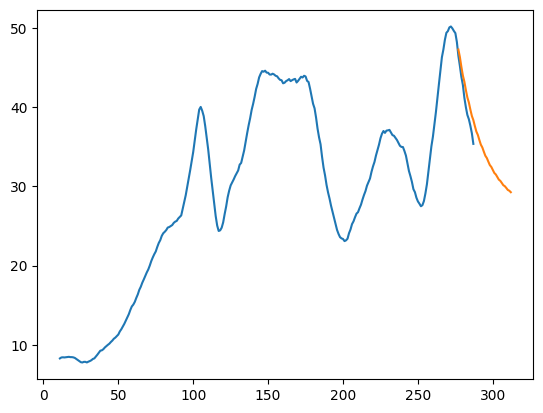

In [ ]:
plt.plot(Export['season_Export'])
plt.plot(result_forecast.predicted_mean[:36])


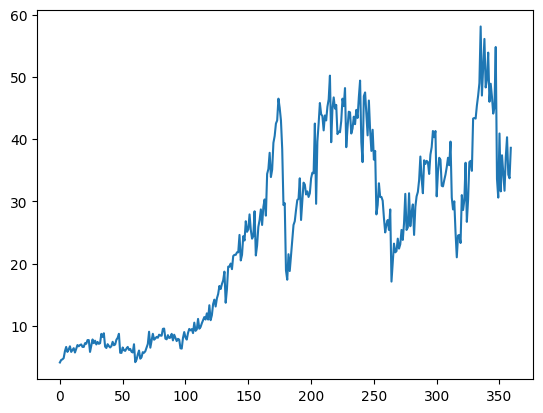

In [ ]:
from pandas import DataFrame

# Планируем график
plt.plot(Export['EX'])
plt.plot(result_full.resid[348:])
plt.show()

# Авторегрессия ЗП

In [ ]:
RS = pd.read_excel("/content/Эконометрика данные 02.06.24.xlsx")
RS.head(500)

,год1,месяц1,ЗП,год2,месяц2,ИПЦ,год3,месяц3,ИПЦ.1,РЗП,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,РЗП.1,РЗП.2,год,СИПЦ,СИПЦ%,ОИПЦ
0,1991,Январь,0.308,1991.0,январь,106.20,1991.0,январь,1.0620,45049.952584,...,NaN,NaN,NaN,NaN,0.002900,3.401819e+00,1991.0,109.308333,1.093083,0.09054
1,1991,Февраль,0.294,NaN,февраль,104.80,NaN,февраль,1.0480,40491.739611,...,NaN,NaN,NaN,NaN,0.002805,3.247191e+00,1992.0,139.233333,1.392333,NaN
2,1991,Март,0.337,NaN,март,106.30,NaN,март,1.0630,44288.168746,...,NaN,NaN,NaN,NaN,0.003170,3.722120e+00,1993.0,120.590000,1.205900,NaN
3,1991,Апрель,0.373,NaN,апрель,163.50,NaN,апрель,1.6350,46114.063111,...,NaN,NaN,NaN,NaN,0.002281,4.119736e+00,1994.0,110.124167,1.101242,NaN
4,1991,Май,0.438,NaN,май,103.00,NaN,май,1.0300,33119.281866,...,NaN,NaN,NaN,NaN,0.004252,4.837652e+00,1995.0,107.305833,1.073058,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2023,Август,69439.000,NaN,август,100.28,NaN,август,1.0028,72131.093405,...,NaN,NaN,NaN,NaN,692.451137,7.669446e+05,NaN,NaN,NaN,NaN
392,2023,Сентябрь,70922.000,NaN,сентябрь,100.87,NaN,сентябрь,1.0087,73465.883631,...,NaN,NaN,NaN,NaN,703.103004,7.833241e+05,NaN,NaN,NaN,NaN
393,2023,Октябрь,73829.500,NaN,октябрь,100.83,NaN,октябрь,1.0083,75818.054950,...,NaN,NaN,NaN,NaN,732.217594,8.154371e+05,NaN,NaN,NaN,NaN
394,2023,Ноябрь,73383.000,NaN,ноябрь,101.11,NaN,ноябрь,1.0111,74739.193424,...,NaN,NaN,NaN,NaN,725.773910,8.105055e+05,NaN,NaN,NaN,NaN


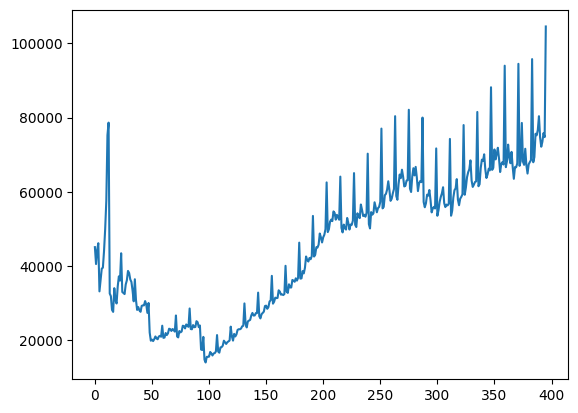

In [ ]:
# Изображение на графике
plt.plot(RS['РЗП'])

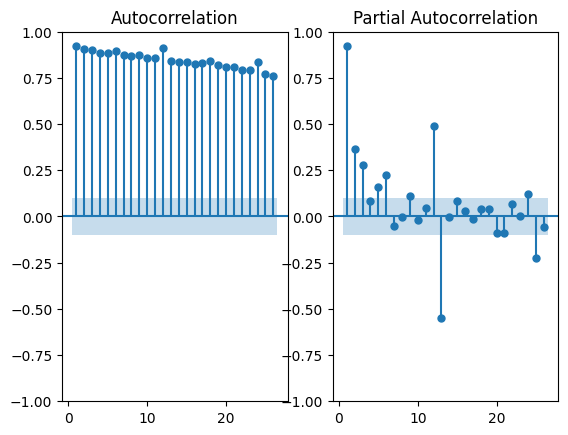

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as smp
fig, axes = plt.subplots(1, 2)
smp.plot_acf(RS['РЗП'], bartlett_confint=False, zero=False, ax=axes[0])
smp.plot_pacf(RS['РЗП'], zero=False, method='ywm',ax=axes[1])
plt.show()

In [ ]:
#1. Тест Дики-Фуллера (DF test) - проверяет наличие гетероскедастичности в остатках модели.
from statsmodels. tsa.stattools import adfuller
adfuller(RS['РЗП'])

(0.5806549355180692,
 0.9871289726533684,
 12,
 383,
 {'1%': -3.44753973676872,
  '5%': -2.8691160516676844,
  '10%': -2.57080585953957},
 7020.53895257412)

In [ ]:
#КПСС
ar.KPSS(RS['РЗП'])

Test Statistic,2.895
P-value,0.000
Lags,11


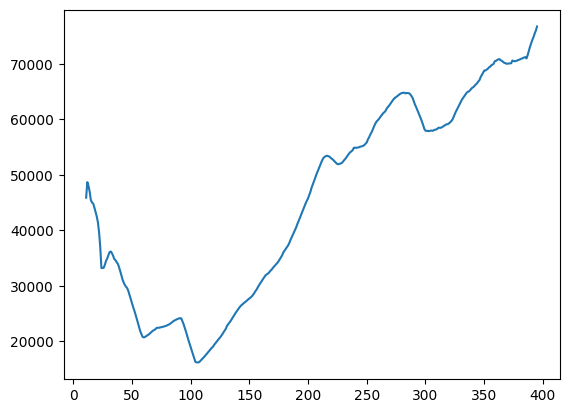

In [ ]:
RS = RS.assign(SРЗП=RS['РЗП'].rolling(window=12).mean())
plt.plot(RS['SРЗП'])


In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.3 MB/s eta 0:00:00


In [ ]:
#тест Дарбина-Ватсона в Python
from statsmodels.stats.stattools import durbin_watson
durbin_watson(RS['РЗП'])

0.020007656974244004

In [ ]:
#Если фактическое значение критерия Дарбина-Уотсона равно 0,02, это может указывать на отсутствие автокорреляции,
#поскольку при отсутствии автокорреляции значение DW должно быть близко к 2

In [ ]:
 pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 10.5 MB/s eta 0:00:00


In [ ]:
import arch.unitroot as ar
ar.ADF(RS['РЗП'])




Test Statistic,0.581
P-value,0.987
Lags,12


In [ ]:
ar.PhillipsPerron(RS['РЗП'])

Test Statistic,-2.085
P-value,0.251
Lags,17


In [ ]:
from pmdarima import auto_arima

# Поиск оптимальных параметров модели ARIMA
model = auto_arima(RS['РЗП'], start_p=1, start_q=1, max_p=3, max_q=3, m=12,seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8001.505, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8122.256, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8064.976, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8007.799, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8120.439, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8006.527, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8004.638, Time=0.44 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8000.288, Time=0.54 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=8002.454, Time=0.87 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=7981.634, Time=2.12 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.90 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8006.154, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=8005.327, Time=0.23 sec

Best model:  ARIMA(1,1,3)(0,0,0)[0] intercept
Total fit time: 9.119 seconds


In [ ]:
import statsmodels.tsa.arima.model as sma
model1 = sma.ARIMA(RS['РЗП'], order=(1,1,3))
result = model1.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                    РЗП   No. Observations:                  396
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -3997.664
Date:                Sun, 02 Jun 2024   AIC                           8005.327
Time:                        15:11:02   BIC                           8025.222
Sample:                             0   HQIC                          8013.210
                                - 396                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4329      1.277     -0.339      0.735      -2.936       2.070
ma.L1         -0.1820      1.273     -0.143      0.886      -2.677       2.313
ma.L2         -0.4345      0.780     -0.557      0.5

In [ ]:
#Анализ остатков модели
import statsmodels.stats.api as sms
sms.jarque_bera(RS['РЗП'])

(17.442348199255246,
 0.00016309558799422474,
 0.1456672069684928,
 2.0139795786434904)

In [ ]:
# Z-тест , тест Бройша-Годфри, тест Андерсона-Дарлинга,  HEGY тест  все в R

In [ ]:
sms.acorr_ljungbox(RS['РЗП'], boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,338.464081,1.378379e-75,335.912844,4.954457e-75
2,665.379557,3.270883e-145,659.542738,6.055001e-144
3,991.463391,1.279310e-214,981.530041,1.827230e-212
4,1306.429644,1.343160e-281,1291.748059,2.047825e-278
5,1622.660154,0.000000e+00,1602.416726,0.000000e+00
6,1947.592496,0.000000e+00,1920.817765,0.000000e+00
7,2256.964013,0.000000e+00,2223.193443,0.000000e+00
8,2561.613299,0.000000e+00,2520.188224,0.000000e+00
9,2871.773481,0.000000e+00,2821.776140,0.000000e+00
10,3171.934856,0.000000e+00,3112.887424,0.000000e+00


In [ ]:
# Прогнозирование (ddof= p+q (в с улчае без ARIMA))
sms.het_arch(result.resid, ddof=5)

(40.64403766866866,
 1.3044511191996584e-05,
 4.47810992390178,
 5.515055169448644e-06)

In [ ]:
# Прогнозирование
Y_forecast = result.get_forecast(steps=10)
print(Y_forecast.predicted_mean)

396    86242.568990
397    81160.000157
398    82337.923189
399    81828.003710
400    82048.746380
401    81953.187515
402    81994.554672
403    81976.646949
404    81984.399150
405    81981.043245
Name: predicted_mean, dtype: float64


In [ ]:
#СВОЙСТВА ПРОГНОЗОВ. Средняя абсолютная процентная ошибка прогнозирование MAPE ( 395 )
model1 = sma.ARIMA(RS['РЗП'][370:], order=(1,1,3), enforce_stationarity=False)
with model1.fix_params({'ar.L1': 0}):
# fit тренирует модель
  result = model1.fit()
  print(result.summary())


                               SARIMAX Results                                
Dep. Variable:                    РЗП   No. Observations:                   26
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -222.665
Date:                Sun, 02 Jun 2024   AIC                            453.329
Time:                        16:08:31   BIC                            457.507
Sample:                             0   HQIC                           454.236
                                 - 26                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1 (fixed)          0        nan        nan        nan         nan         nan
ma.L1            -0.9127      1.382     -0.661      0.509      -3.620       1.795
ma.L2            -0.0703      2.621     

In [ ]:
result_full = result.apply(RS['РЗП'])
result_forecast = result.get_forecast(steps=100)
E = RS['РЗП'][370:] - result_forecast.predicted_mean

In [ ]:
result_forecast.predicted_mean[:25]

396    77320.162486
397    75200.146549
398    79313.934209
399    79313.934209
400    79313.934209
401    79313.934209
402    79313.934209
403    79313.934209
404    79313.934209
405    79313.934209
406    79313.934209
407    79313.934209
408    79313.934209
409    79313.934209
410    79313.934209
411    79313.934209
412    79313.934209
413    79313.934209
414    79313.934209
415    79313.934209
416    79313.934209
417    79313.934209
418    79313.934209
419    79313.934209
420    79313.934209
Name: predicted_mean, dtype: float64

In [ ]:
result_full.resid[370:396]

370     -912.446085
371    26249.791378
372    -3214.528923
373      316.374210
374     6750.370771
375    -3838.742776
376    -3915.919221
377     -424.656754
378    -4603.102962
379    -5915.434275
380    -3177.243708
381    -2074.743357
382     -786.893517
383    26824.382526
384    -3107.917512
385      544.199665
386     2899.367823
387     2694.368147
388     4036.812014
389     7176.726811
390      748.021097
391    -1890.557630
392    -1322.095516
393      910.106282
394      -81.938802
395    30004.109422
dtype: float64

КОИНТЕГРАЦИЯ

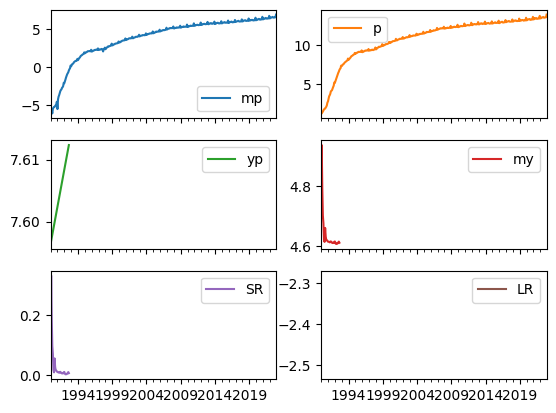

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as smts_stats
import matplotlib.pyplot as plt
dataset = pd.read_excel('/content/Эконометрика данные 02.06.24.xlsx', names=['date', 'mp', 'p', 'yp', 'my', 'SR', 'LR']).drop('date', axis=1)
dataset = np.log(dataset)
dataset.index = pd.date_range('1990', periods=396, freq='M')
dataset.plot(subplots=True, layout=(3,2))
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as smts_stats
import matplotlib.pyplot as plt
dataset = pd.read_excel('/content/Эконометрика данные 02.06.24.xlsx', names=['date', 'mp', 'p', 'yp', 'my', 'SR', 'LR']).drop('date', axis=1)
dataset = np.log(dataset)
dataset.index = pd.date_range('1990', periods=396, freq='M')
dataset.plot(subplots=True, layout=(3,2))
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Эконометрика данные 02.06.24.xlsx'

# Новый раздел

это не работает

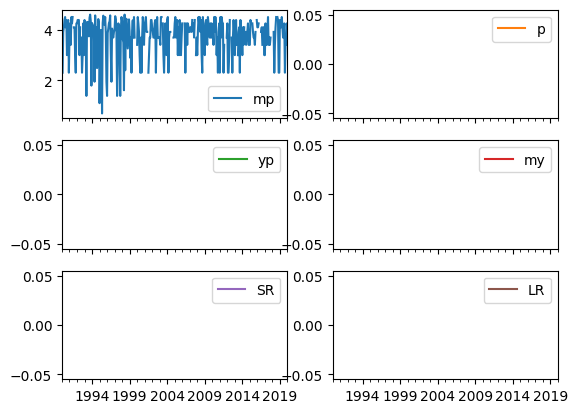

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as smts_stats
import matplotlib.pyplot as plt
dataset = pd.read_csv('data_export.csv', names=['date', 'mp', 'p', 'yp', 'my', 'SR', 'LR']).drop('date', axis=1)
dataset = np.log(dataset)
dataset.index = pd.date_range('1990', periods=361, freq='M')
dataset.plot(subplots=True, layout=(3,2))
plt.show()

In [ ]:
def egprint(res):
  print(pd.Series(res[0:3],index=['Test Statistic','p-value','Critical Values 1%,5%,10%']))
for tr in ['c', 'ct', 'ctt']:
  egprint(smts_stats.coint(dataset.SR, dataset.LR, trend=tr, autolag='AIC'))


In [ ]:
for tr in ['c', 'ct', 'ctt']:
egprint(smts_stats.coint(dataset.mp, dataset[['yp', 'SR']], trend=tr,autolag='AIC'))

Векторные авторегрессии

In [ ]:
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smts
for tr in ['c', 'ct', 'ctt']:
  egprint(smts_stats.coint(dataset.my, dataset.mp, trend=tr,autolag='AIC'))


Test Statistic                                                            -inf
p-value                                                                    0.0
Critical Values 1%,5%,10%    [-3.924381211344336, -3.3516423377663833, -3.0...
dtype: object
Test Statistic                                                            -inf
p-value                                                                    0.0
Critical Values 1%,5%,10%    [-4.3669339913475405, -3.80472485338888, -3.51...
dtype: object
Test Statistic                                                            -inf
p-value                                                                    0.0
Critical Values 1%,5%,10%    [-4.744385777774172, -4.187750601477774, -3.90...
dtype: object


In [ ]:
smts_stats.adfuller(dataset.mp)


(-1.6836570065471557,
 0.43955193867814824,
 17,
 378,
 {'1%': -3.4477686860685, '5%': -2.869216670067509, '10%': -2.570859500573892},
 -1026.8853270164263)

# Авторегрессия ИПЦ

In [ ]:
df = pd.read_excel("data_metric.xlsx")
df.head(500)

,Индексы потребительских цен на услуги по Российской Федерации в 1991-2024*)гг.,месяц,индекс
0,2000,январь,102.33
1,2000,февраль,101.04
2,2000,март,100.64
3,2000,апрель,100.89
4,2000,май,101.75
...,...,...,...
283,2023,август,100.28
284,2023,сентябрь,100.87
285,2023,октябрь,100.83
286,2023,ноябрь,101.11


In [ ]:
df['index_cor']=df['индекс'].apply(lambda x: x-100)

In [ ]:
df.head(500)

,Индексы потребительских цен на услуги по Российской Федерации в 1991-2024*)гг.,месяц,индекс,index_cor
0,2000,январь,102.33,2.33
1,2000,февраль,101.04,1.04
2,2000,март,100.64,0.64
3,2000,апрель,100.89,0.89
4,2000,май,101.75,1.75
...,...,...,...,...
283,2023,август,100.28,0.28
284,2023,сентябрь,100.87,0.87
285,2023,октябрь,100.83,0.83
286,2023,ноябрь,101.11,1.11


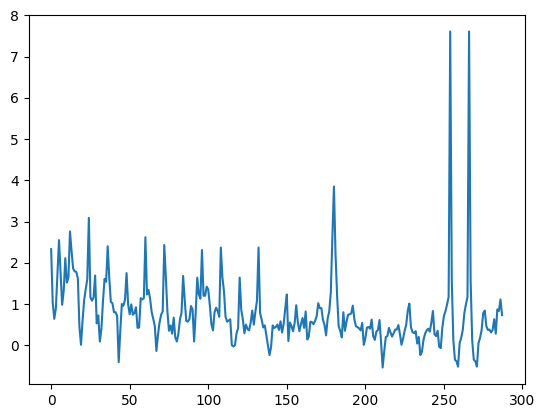

In [ ]:
# берем данные с 99 года
plt.plot(df['index_cor'])


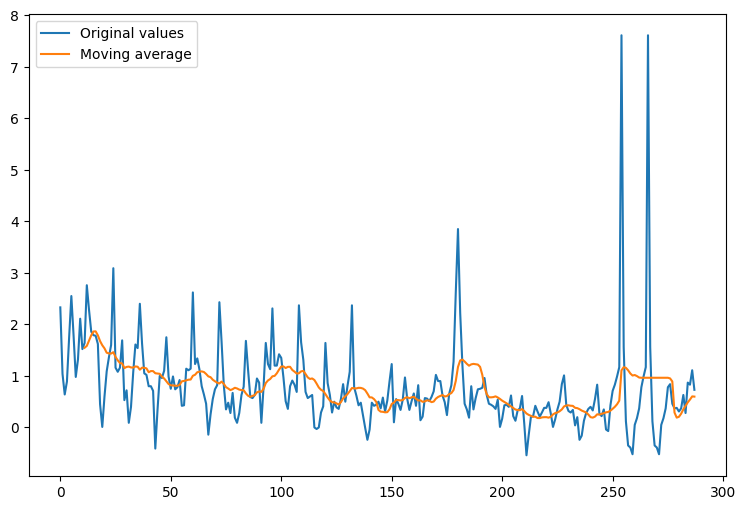

In [ ]:
df['rolling_mean_1'] = df['index_cor'].rolling(12).mean()

# берем с 108 наблюдения, это 2000
# Рисуем график
plt.figure(figsize=(9,6))
plt.plot(df['index_cor'], label='Original values')
plt.plot(df['rolling_mean_1'], label='Moving average')
plt.legend()
plt.show()

Смотрим стационарен ли исходный процесс

In [ ]:
import csv

# Предположим, у нас есть список данных

# Открываем файл для записи
with open('CPI.csv', 'w', newline='') as file:
    # Создаем объект writer
    writer = csv.writer(file)
    # Записываем данные в файл
    writer.writerows(df)

# Данные успешно сохранены в fruits.csv

In [ ]:
#Расширенный тест Дики-Фуллера (Augmented DF) используется для проверки гипотезы
#о единичном корне в временном ряду. Если гипотеза отклоняется, процесс признается
#стационарным, в противном случае процесс может содержать единичные корни и быть
#нестационарным. Расширенный тест включает в себя лаги первых разностей временного ряда,
#что позволяет учесть возможность авторегрессии более высокого порядка. Критические значения
#статистики для этого теста могут быть получены с помощью имитационного моделирования
#дики фуллер (проверка на стационарность Н0: ряд нестационарен, Н1: ряд стационарен) если p<0,05 следовательно ряд стационарен
from statsmodels. tsa.stattools import adfuller

#perform augmented Dickey-Fuller test
adfuller(df['index_cor'])
#adfuller(df['index_cor'][108:])

(-3.306375302190477,
 0.014595892344766744,
 12,
 275,
 {'1%': -3.454355055831705,
  '5%': -2.8721080938842976,
  '10%': -2.572401325619835},
 562.7753613346883)

In [ ]:
ar.ADF(df['index_cor']).summary()


Test Statistic,-3.306
P-value,0.015
Lags,12


In [ ]:
# KPSS тест (H 0 : Временной ряд имеет стационарный тренд. H A : временной ряд не имеет стационарного тренда.)
#ar.KPSS(df["index_cor"][96:]).summary()
ar.KPSS(df['index_cor']).summary()

Test Statistic,1.036
P-value,0.002
Lags,7


In [ ]:
#Тоже на наличие единичного корня
#PhillipsPerron(df["index_cor"][96:])
PhillipsPerron(df['index_cor'])

Test Statistic,-10.741
P-value,0.000
Lags,16


In [ ]:


import statsmodels.api as sm

#perform KPSS test
sm. tsa.stattools.kpss (df['index_cor'], regression='ct')


(0.13868861852567366,
 0.06353959532282655,
 6,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [ ]:
!pip install arch

In [ ]:
from arch.unitroot import PhillipsPerron

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as smp

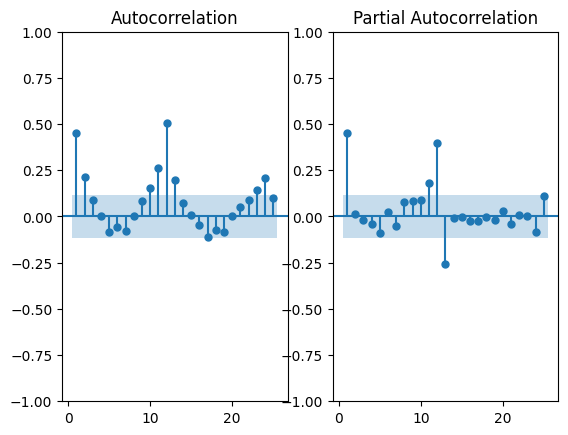

In [ ]:
fig, axes = plt.subplots(1, 2)
smp.plot_acf(df['index_cor'], bartlett_confint=False, zero=False, ax=axes[0])
smp.plot_pacf(df['index_cor'], zero=False, method='ywm',ax=axes[1])
plt.show()

Смотрим на сглаженный процесс

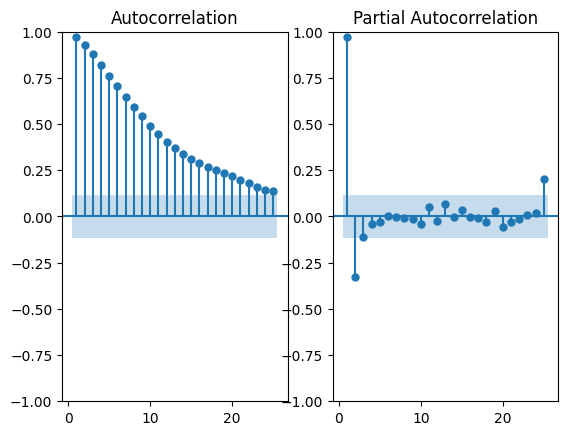

In [ ]:
fig, axes = plt.subplots(1, 2)
smp.plot_acf(df['rolling_mean_1'][11:], bartlett_confint=False, zero=False, ax=axes[0])
smp.plot_pacf(df['rolling_mean_1'][11:], zero=False, method='ywm',ax=axes[1])
plt.show()

In [ ]:
print(df['rolling_mean_1'][11:])

11     1.546667
12     1.582500
13     1.685833
14     1.787500
15     1.862500
         ...   
283    0.418333
284    0.486667
285    0.540833
286    0.602500
287    0.598333
Name: rolling_mean_1, Length: 277, dtype: float64


In [ ]:
ar.ADF(df["rolling_mean_1"][11:]).summary()


Test Statistic,-3.094
P-value,0.027
Lags,1


In [ ]:
# KPSS тест (H 0 : Временной ряд имеет стационарный тренд. H A : временной ряд не имеет стационарного тренда.)
#ar.KPSS(df["index_cor"][96:]).summary()
ar.KPSS(df["rolling_mean_1"][11:]).summary()

Test Statistic,1.122
P-value,0.001
Lags,10


In [ ]:
#Тоже на наличие единичного корня
#PhillipsPerron(df["index_cor"][96:])
PhillipsPerron(df["rolling_mean_1"][11:])

Test Statistic,-2.648
P-value,0.083
Lags,16


Удалим сезонность

In [ ]:
month_avgs = heater_series.groupby(df["rolling_mean_1"][11:].index.month).mean()

In [ ]:
from pmdarima import auto_arima

# Поиск оптимальных параметров модели ARIMA
model = auto_arima(df["rolling_mean_1"][11:], start_p=1, start_q=1, max_p=4, max_q=3, m=12,seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-732.109, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-677.945, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-734.099, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-724.843, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-679.287, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-732.110, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-730.099, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-735.854, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-733.862, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-733.861, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-726.425, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-731.855, Time=0.18 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.360 seconds


In [ ]:
import statsmodels.tsa.arima.model as sma
model = sma.ARIMA(df["rolling_mean_1"][11:], order=(3,0,2))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:         rolling_mean_1   No. Observations:                  277
Model:                 ARIMA(3, 0, 2)   Log Likelihood                 374.529
Date:                Tue, 04 Jun 2024   AIC                           -735.058
Time:                        14:58:27   BIC                           -709.690
Sample:                             0   HQIC                          -724.879
                                - 277                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7984      0.132      6.068      0.000       0.541       1.056
ar.L1          0.6321      0.171      3.704      0.000       0.298       0.967
ar.L2          0.8477      0.094      8.986      0.0

In [ ]:
#Тест Харке-Бера
import statsmodels.stats.api as sms
sms.jarque_bera(result.resid,  )

(28733.031255631857, 0.0, 3.3747388841911268, 52.436313201708835)

In [ ]:
#ARCH тест
sms.het_arch(result.resid, ddof=2)

(2.2261899612926497, 0.994294175275922, 0.2168803009732861, 0.9946328467712006)

In [ ]:
sms.acorr_ljungbox(result.resid, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.352337,0.552793,0.348549,0.554936
2,1.229889,0.540671,1.213519,0.545114
3,1.312306,0.726213,1.294459,0.730449
4,1.770317,0.777908,1.742620,0.782962
5,2.303981,0.805682,2.262895,0.811701
6,2.306153,0.889500,2.265005,0.893785
7,2.523744,0.925299,2.475577,0.928925
8,2.527892,0.960418,2.479576,0.962677
9,2.699126,0.975040,2.644059,0.976755
10,2.812921,0.985490,2.752959,0.986655


In [ ]:
dataset = pd.DataFrame({'Y': result.resid})
sms.acorr_breusch_godfrey(smf.ols('Y ~ 1', data=dataset).fit(), nlags=1)

(2.7103203092406307,
 0.9874437746344475,
 0.2628408050462651,
 0.9884252180154578)

In [ ]:
dataset = pd.DataFrame({'Y': result.resid})
sms.acorr_breusch_godfrey(smf.ols('Y ~ 1', data=dataset).fit(), nlags=12)

(4.512571772831816,
 0.9723150495803936,
 0.36433452966327723,
 0.9746627889568722)

In [ ]:
sms.acorr_breusch_godfrey(smf.ols(”Y ~ 1”, data=dataset).fit(), nlags=10)


In [ ]:
from scipy.stats import anderson
anderson(result.resid)

AndersonResult(statistic=28.415866756133596, critical_values=array([0.568, 0.647, 0.776, 0.905, 1.077]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.0003810052448187227, scale=0.07657716820577305)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(result.resid)

1.6266109541236573

In [ ]:
from scipy.stats import kstest

#perform Kolmogorov-Smirnov test
kstest(result.resid, 'norm')

KstestResult(statistic=0.44894578890809556, pvalue=1.855882066534003e-51, statistic_location=-0.06467459079790605, statistic_sign=-1)

# Валютный курс

In [ ]:
var= pd.read_csv("/content/общий1.csv", sep=";", decimal=",")

var.head(500)

,YEAR,INDEX,EX,value
0,2000,101.546667,8.267500,27.992500
1,2001,101.582500,8.388333,28.109167
2,2001,101.685833,8.409167,28.113333
3,2001,101.787500,8.390833,28.110833
4,2001,101.862500,8.414167,28.152500
...,...,...,...,...
272,2023,100.418333,39.016667,60.238600
273,2023,100.486667,38.475000,55.298700
274,2023,100.540833,37.658333,61.622900
275,2023,100.602500,36.708333,60.880300


In [ ]:
for lag in range(1, 14):
    heater_series = ice_cream_heater_df['heater'].iloc[lag:]
    lagged_ice_cream_series = ice_cream_heater_df['ice cream'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(heater_series, lagged_ice_cream_series))
    print('------')

NameError: name 'ice_cream_heater_df' is not defined

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr

In [ ]:
var['value']

0      27.992500
1      28.109167
2      28.113333
3      28.110833
4      28.152500
         ...    
272    60.238600
273    55.298700
274    61.622900
275    60.880300
276    70.337500
Name: value, Length: 277, dtype: float64

In [ ]:
var = var[['value', 'EX']]

In [ ]:
class VAR:
    def __init__(self, var):
        self.var = var
        # другие инициализирующие действия...

# Пример использования:
model = VAR(var)

In [ ]:
model = VAR(var)

In [ ]:
pip install --upgrade statsmodels

In [ ]:
pip install --upgrade statsmodels

In [ ]:
model_fit = model.fit(maxlags=12,)

In [ ]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 05, Jun, 2024
Time:                     10:06:17
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  -0.686137
Nobs:                     265.000    HQIC:                  -1.09018
Log likelihood:          -521.631    FPE:                   0.256550
AIC:                     -1.36156    Det(Omega_mle):        0.214224
--------------------------------------------------------------------
Results for equation value
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.442122         0.400099            1.105           0.269
L1.value          0.970835         0.065384           14.848           0.000
L1.EX            -1.075230         0.513150           -2.095           0.036

In [ ]:
Export_season = Export['season_Export'][12:].diff().dropna()

# Валютный курс

# Авторегрессия валютный курс

In [ ]:
 pip install arch

In [ ]:
import arch.unitroot as ar

In [ ]:
vf = pd.read_excel("/content/valyutny_kurs1.xlsx",decimal=".")
vf.head(500)

,data,value,values
0,2000-01-01,27.0000,NaN
1,2000-02-01,28.5500,NaN
2,2000-03-01,28.6500,NaN
3,2000-04-01,28.4000,NaN
4,2000-05-01,28.2000,NaN
...,...,...,...
272,2022-09-01,60.2386,69.556650
273,2022-10-01,55.2987,68.109525
274,2022-11-01,61.6229,68.936433
275,2022-12-01,60.8803,67.768742


In [ ]:
vf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    277 non-null    datetime64[ns]
 1   value   277 non-null    float64       
 2   values  266 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.6 KB


In [ ]:
vf['index_cor']=df['индекс'].apply(lambda x: x-100)

In [ ]:
vf.head(500)

,data,value,values
0,2000-01-01,27.0000,NaN
1,2000-02-01,28.5500,NaN
2,2000-03-01,28.6500,NaN
3,2000-04-01,28.4000,NaN
4,2000-05-01,28.2000,NaN
...,...,...,...
272,2022-09-01,60.2386,69.556650
273,2022-10-01,55.2987,68.109525
274,2022-11-01,61.6229,68.936433
275,2022-12-01,60.8803,67.768742


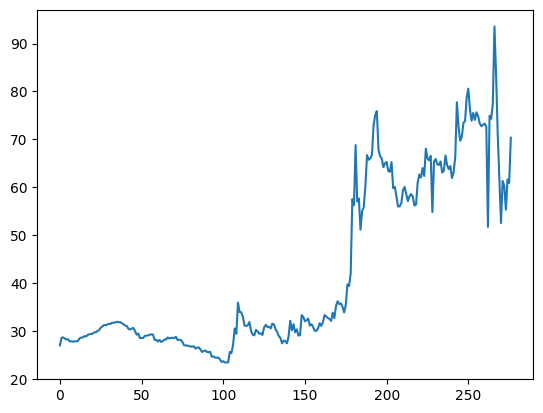

In [ ]:
# берем данные с 2000года
plt.plot(vf['value'])


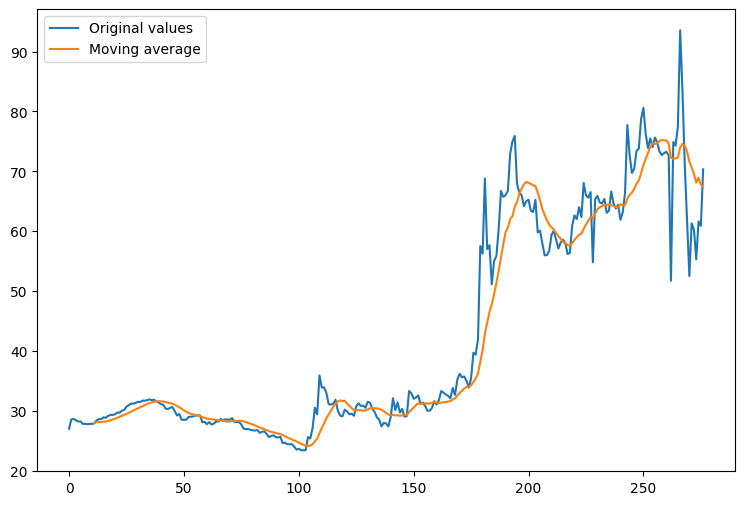

In [ ]:
vf['value_rolling'] = vf['value'].rolling(12).mean()

# берем с 108 наблюдения, это 2000
# Рисуем график
plt.figure(figsize=(9,6))
plt.plot(vf['value'], label='Original values')
plt.plot(vf['value_rolling'], label='Moving average')
plt.legend()
plt.show()

Смотрим стационарен ли исходный процесс

In [ ]:
import csv

# Предположим, у нас есть список данных

# Открываем файл для записи
with open('CPI.csv', 'w', newline='') as file:
    # Создаем объект writer
    writer = csv.writer(file)
    # Записываем данные в файл
    writer.writerows(df)

# Данные успешно сохранены в fruits.csv

NameError: name 'df' is not defined

In [ ]:
#Расширенный тест Дики-Фуллера (Augmented DF) используется для проверки гипотезы
#о единичном корне в временном ряду. Если гипотеза отклоняется, процесс признается
#стационарным, в противном случае процесс может содержать единичные корни и быть
#нестационарным. Расширенный тест включает в себя лаги первых разностей временного ряда,
#что позволяет учесть возможность авторегрессии более высокого порядка. Критические значения
#статистики для этого теста могут быть получены с помощью имитационного моделирования
#дики фуллер (проверка на стационарность Н0: ряд нестационарен, Н1: ряд стационарен) если p<0,05 следовательно ряд стационарен
from statsmodels. tsa.stattools import adfuller

#perform augmented Dickey-Fuller test
adfuller(vf['value'])
#adfuller(df['index_cor'][108:])

(-0.7812750659869746,
 0.8245605940851618,
 11,
 265,
 {'1%': -3.4552699038400827,
  '5%': -2.8725092359464526,
  '10%': -2.5726152830188678},
 1388.2344035324047)

In [ ]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 6.5 MB/s eta 0:00:00


In [ ]:
import arch.unitroot as ar

In [ ]:
ar.ADF(vf['value']).summary()


Test Statistic,-0.781
P-value,0.825
Lags,11


In [ ]:
# KPSS тест (H 0 : Временной ряд имеет стационарный тренд. H A : временной ряд не имеет стационарного тренда.)
#ar.KPSS(df["index_cor"][96:]).summary()
ar.KPSS(vf['value']).summary()

Test Statistic,2.085
P-value,0.000
Lags,10


In [ ]:
#Тоже на наличие единичного корня
#PhillipsPerron(df["index_cor"][96:])
ar.PhillipsPerron(vf['value'])

Test Statistic,-0.868
P-value,0.798
Lags,16


In [ ]:


import statsmodels.api as sm

#perform KPSS test
sm. tsa.stattools.kpss (df['index_cor'], regression='ct')


NameError: name 'df' is not defined

In [ ]:
!pip install arch

In [ ]:
from arch.unitroot import PhillipsPerron

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as smp

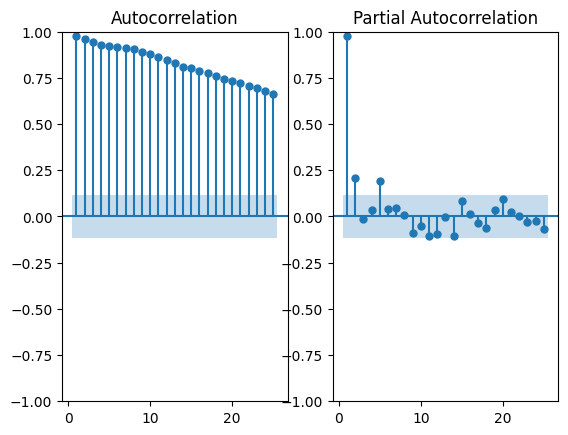

In [ ]:
fig, axes = plt.subplots(1, 2)
smp.plot_acf(vf['value'], bartlett_confint=False, zero=False, ax=axes[0])
smp.plot_pacf(vf['value'], zero=False, method='ywm',ax=axes[1])
plt.show()

Смотрим на сглаженный процесс

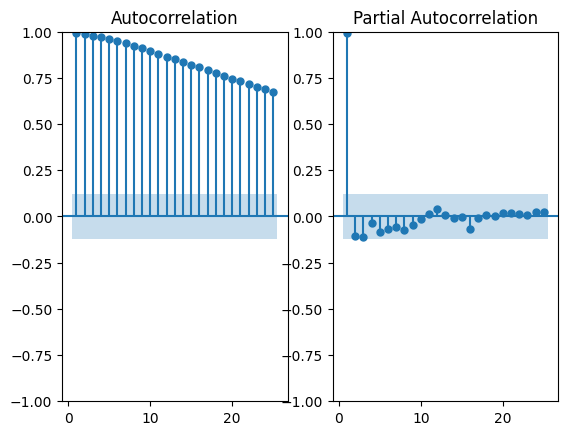

In [ ]:
fig, axes = plt.subplots(1, 2)
smp.plot_acf(vf['value_rolling'][11:], bartlett_confint=False, zero=False, ax=axes[0])
smp.plot_pacf(vf['value_rolling'][11:], zero=False, method='ywm',ax=axes[1])
plt.show()

In [ ]:
print(vf['value_rolling'])

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
272    69.556650
273    68.109525
274    68.936433
275    67.768742
276    67.439150
Name: value_rolling, Length: 277, dtype: float64


In [ ]:
ar.ADF(vf['value_rolling'][11:]).summary()


Test Statistic,0.004
P-value,0.959
Lags,15


In [ ]:
# KPSS тест (H 0 : Временной ряд имеет стационарный тренд. H A : временной ряд не имеет стационарного тренда.)
#ar.KPSS(df["index_cor"][96:]).summary()
ar.KPSS(vf['value_rolling'][11:]).summary()

Test Statistic,2.033
P-value,0.000
Lags,10


In [ ]:
#Тоже на наличие единичного корня
#PhillipsPerron(df["index_cor"][96:])
ar.PhillipsPerron(vf['value_rolling'][11:])

Test Statistic,-0.404
P-value,0.909
Lags,16


Берем разность

In [ ]:
value_rolling = vf['value_rolling'][11:].diff().dropna()

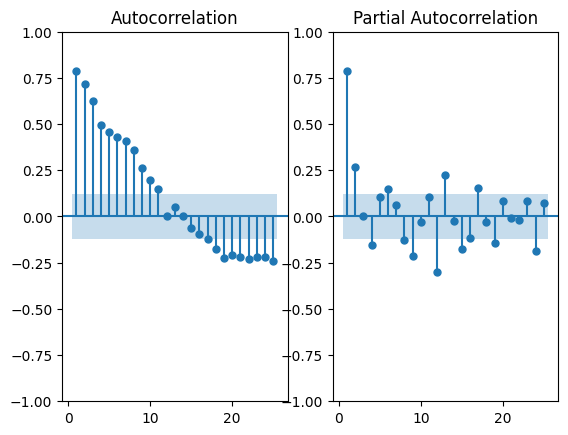

In [ ]:
fig, axes = plt.subplots(1, 2)
smp.plot_acf(value_rolling , bartlett_confint=False, zero=False, ax=axes[0])
smp.plot_pacf(value_rolling , zero=False, method='ywm',ax=axes[1])
plt.show()

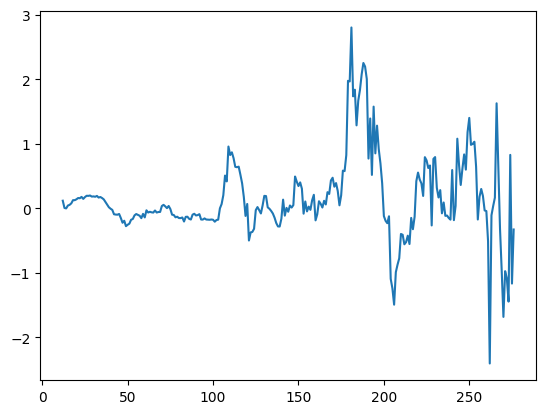

In [ ]:
plt.plot(value_rolling)

In [ ]:
print(value_rolling )

12     0.116667
13     0.004167
14    -0.002500
15     0.041667
16     0.052500
         ...   
272   -1.086625
273   -1.447125
274    0.826908
275   -1.167692
276   -0.329592
Name: value_rolling, Length: 265, dtype: float64


In [ ]:
ar.ADF(value_rolling ).summary()


Test Statistic,-3.255
P-value,0.017
Lags,16


In [ ]:
# KPSS тест (H 0 : Временной ряд имеет стационарный тренд. H A : временной ряд не имеет стационарного тренда.)
#ar.KPSS(df["index_cor"][96:]).summary()
ar.KPSS(value_rolling ).summary()

Test Statistic,0.185
P-value,0.299
Lags,9


In [ ]:
#Тоже на наличие единичного корня
#PhillipsPerron(df["index_cor"][96:])
ar.PhillipsPerron(value_rolling)

Test Statistic,-6.120
P-value,0.000
Lags,16



Normalize

In [ ]:

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
avg, dev = vf['value'].mean(), vf['value'].std()

In [ ]:

vf['value'] = (vf['value'] - avg) / dev

In [ ]:
plot_series(vf['value'])
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

NameError: name 'plot_series' is not defined

Удалим сезонность

In [ ]:
month_avgs = heater_series.groupby(df["rolling_mean_1"][11:].index.month).mean()

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.6 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

# Поиск оптимальных параметров модели ARIMA
model = auto_arima(vf['value_rolling'][11:], start_p=1, start_q=1, max_p=4, max_q=3, m=12,seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=245.329, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=512.570, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=260.927, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=381.683, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=524.892, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=243.390, Time=1.42 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=241.464, Time=0.47 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=243.312, Time=0.61 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.30 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=240.219, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=260.518, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=242.103, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=242.161, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=244.062, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time

In [ ]:
import statsmodels.tsa.arima.model as sma
model = sma.ARIMA(vf['value_rolling'][11:], order=(3,1,2))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:          value_rolling   No. Observations:                  266
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -103.223
Date:                Wed, 05 Jun 2024   AIC                            218.446
Time:                        06:30:11   BIC                            239.925
Sample:                             0   HQIC                           227.076
                                - 266                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4211      0.021    -19.642      0.000      -0.463      -0.379
ar.L2          0.0954      0.028      3.447      0.001       0.041       0.150
ar.L3          0.8212      0.029     28.424      0.0

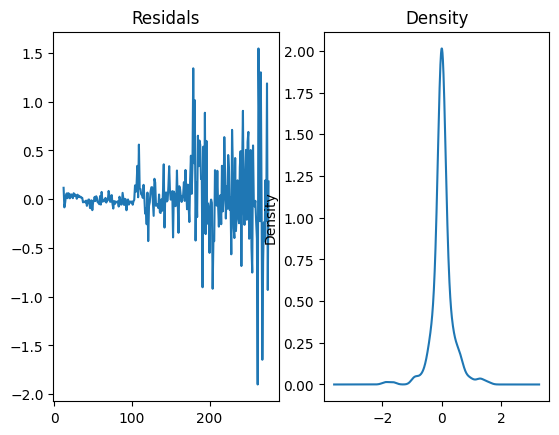

In [ ]:
import matplotlib.pyplot as plt
residuals = result.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

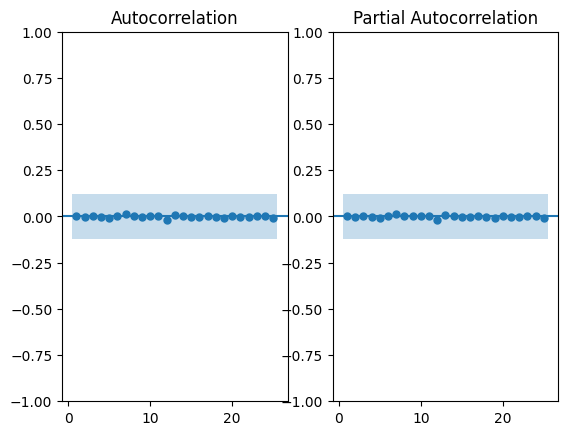

In [ ]:
fig, axes = plt.subplots(1, 2)
smp.plot_acf(result.resid, bartlett_confint=False, zero=False, ax=axes[0])
smp.plot_pacf(result.resid, zero=False, method='ywm',ax=axes[1])
plt.show()

In [ ]:
#Тест Харке-Бера это ARIMA(3,1,2)
import statsmodels.stats.api as sms
sms.jarque_bera(result.resid,  )

(649356.1303423542, 0.0, 15.236275230120475, 243.12485649523242)

In [ ]:
#ARCH тест
sms.het_arch(result.resid, ddof=2)

(66.65244530742628,
 1.9552052122843647e-10,
 8.716339600543899,
 3.3957945102744073e-12)

In [ ]:
sms.acorr_ljungbox(result.resid, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.000032,0.995518,0.000031,0.995543
2,0.005073,0.997467,0.004997,0.997505
3,0.006021,0.999876,0.005928,0.999879
4,0.006042,0.999995,0.005948,0.999996
5,0.020647,0.999997,0.020172,0.999997
6,0.021932,1.000000,0.021418,1.000000
7,0.063785,1.000000,0.061866,1.000000
8,0.063790,1.000000,0.061871,1.000000
9,0.063798,1.000000,0.061878,1.000000
10,0.067894,1.000000,0.065791,1.000000


In [ ]:
dataset = pd.DataFrame({'Y': result.resid})
sms.acorr_breusch_godfrey(smf.ols('Y ~ 1', data=dataset).fit(), nlags=1)

(0.0018235461239808348,
 0.9659382888923281,
 0.0018098476581774575,
 0.9660985457958394)

In [ ]:
dataset = pd.DataFrame({'Y': result.resid})
sms.acorr_breusch_godfrey(smf.ols('Y ~ 1', data=dataset).fit(), nlags=12)

(0.1064773092834963,
 0.9999999999697851,
 0.008442840507522382,
 0.9999999999747923)

In [ ]:
sms.acorr_breusch_godfrey(smf.ols(”Y ~ 1”, data=dataset).fit(), nlags=10)


SyntaxError: invalid character '”' (U+201D) (<ipython-input-68-c6dd358fbd18>, line 1)

In [ ]:
from scipy.stats import anderson
anderson(result.resid)

AndersonResult(statistic=28.415866756133596, critical_values=array([0.568, 0.647, 0.776, 0.905, 1.077]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.0003810052448187227, scale=0.07657716820577305)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(result.resid)

1.6266109541236573

In [ ]:
from scipy.stats import kstest

#perform Kolmogorov-Smirnov test
kstest(result.resid, 'norm')

KstestResult(statistic=0.44894578890809556, pvalue=1.855882066534003e-51, statistic_location=-0.06467459079790605, statistic_sign=-1)